# <center> Wavelets </center>

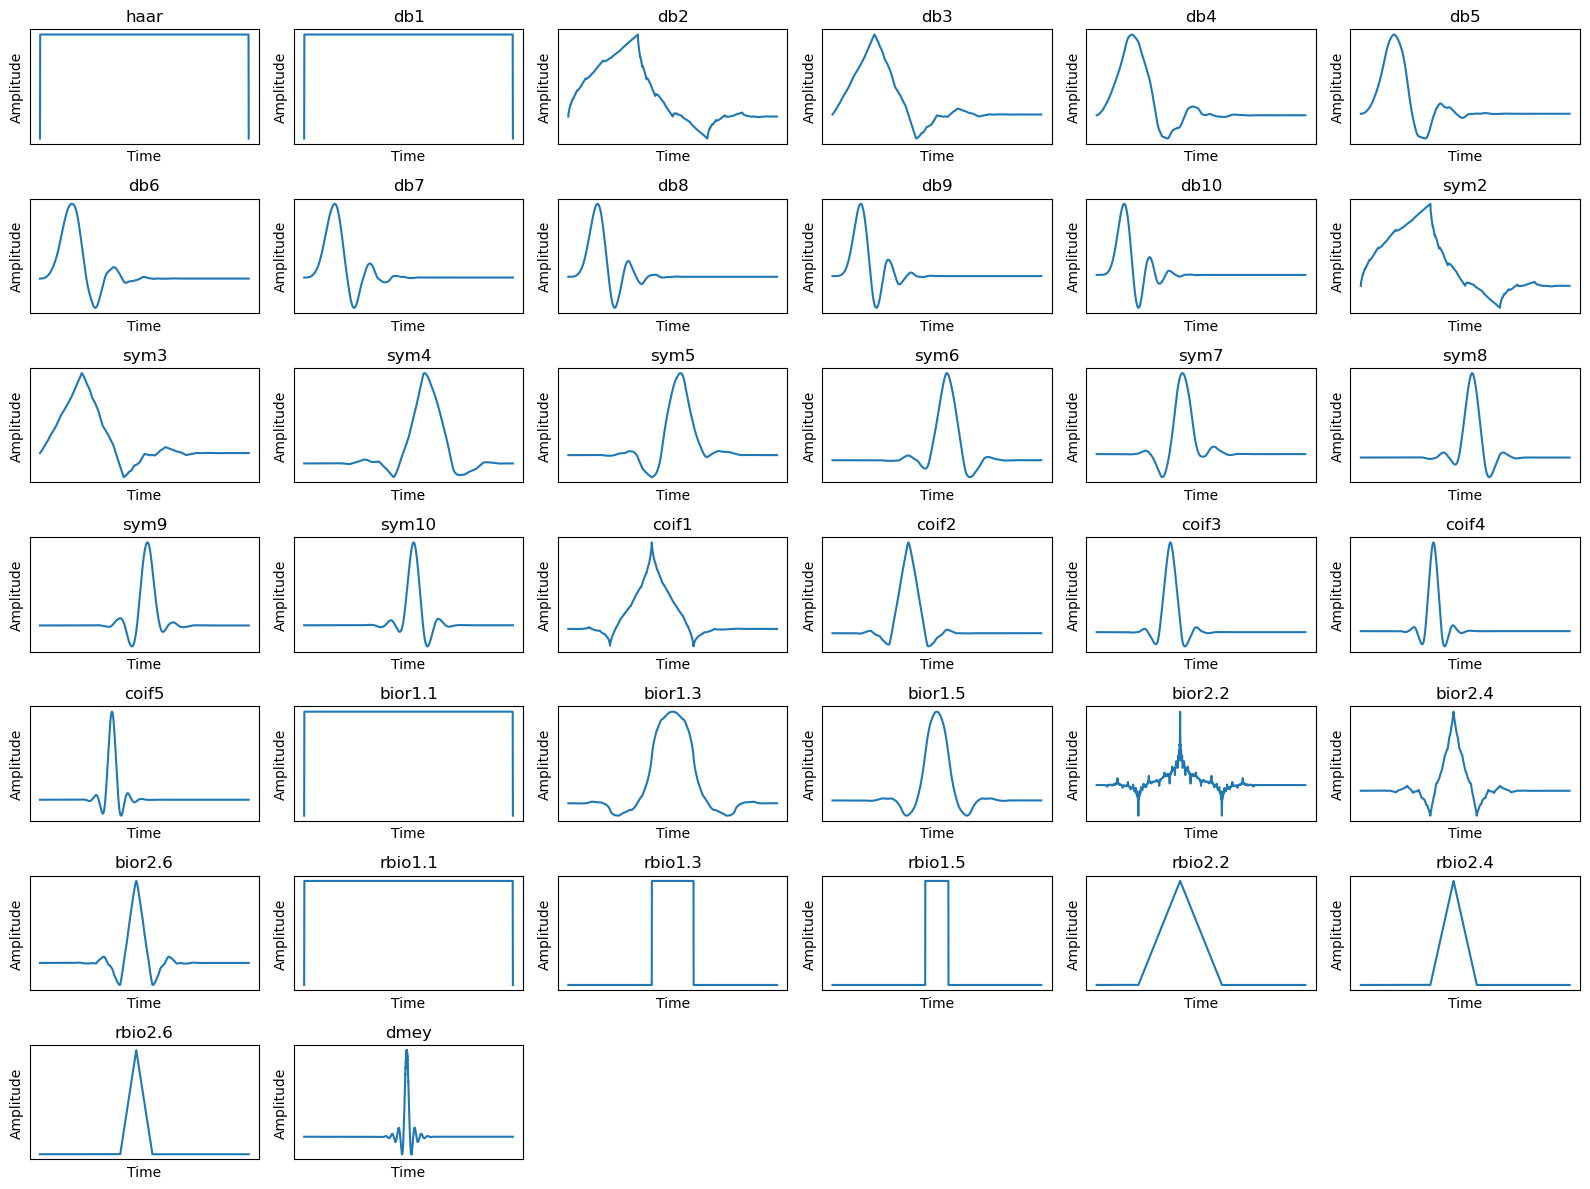

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Define a list of discrete wavelet functions to test
discrete_wavelets = [
    'haar',
    'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10',
    'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10',
    'coif1', 'coif2', 'coif3', 'coif4', 'coif5',
    'bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6',
    'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6',
    'dmey',
]

# Create subplots for each discrete wavelet
plt.figure(figsize=(16, 12))
for i, wavelet_func in enumerate(discrete_wavelets):
    wavelet = pywt.Wavelet(wavelet_func)
    wavelet_data = wavelet.wavefun(level=10)
    
    plt.subplot(7, 6, i+1)
    plt.plot(wavelet_data[0])
    plt.title(wavelet_func)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


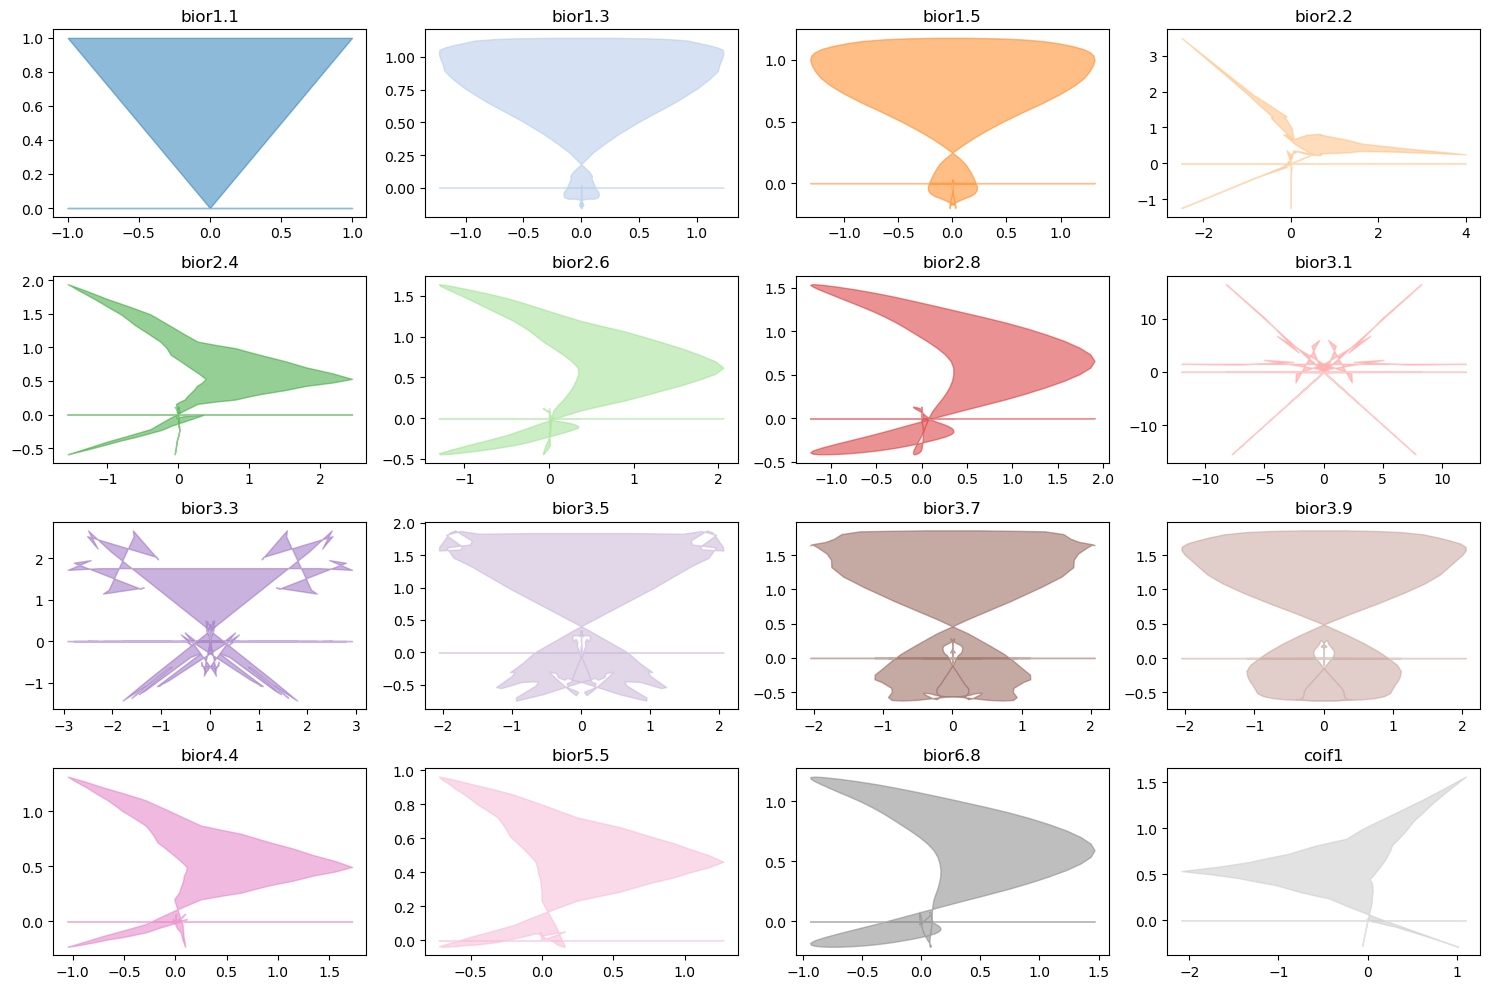

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

# Define the discrete wavelets to plot
discrete_wavelets = pywt.wavelist(kind='discrete')

# Plotting parameters
num_rows = 4
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axs array for easier indexing
axs_flat = axs.flatten()

# Plot each wavelet
for i, wavelet_func in enumerate(discrete_wavelets):
    if i < num_rows * num_cols:  # Check if we exceed the number of subplots
        wavelet = pywt.Wavelet(wavelet_func)
        wavelet_data = wavelet.wavefun(level=5)
        
        # Adjust plot appearance for each wavelet
        color = plt.cm.tab20(i % 20)  # Cycle through 20 distinct colors
        linestyle = '-' if i % 2 == 0 else '--'  # Alternate line styles
        
        ax = axs_flat[i]
        ax.fill_between(wavelet_data[1], wavelet_data[0], color=color, alpha=0.5)
        ax.set_title(wavelet_func)

# Adjust layout
plt.tight_layout()
plt.show()


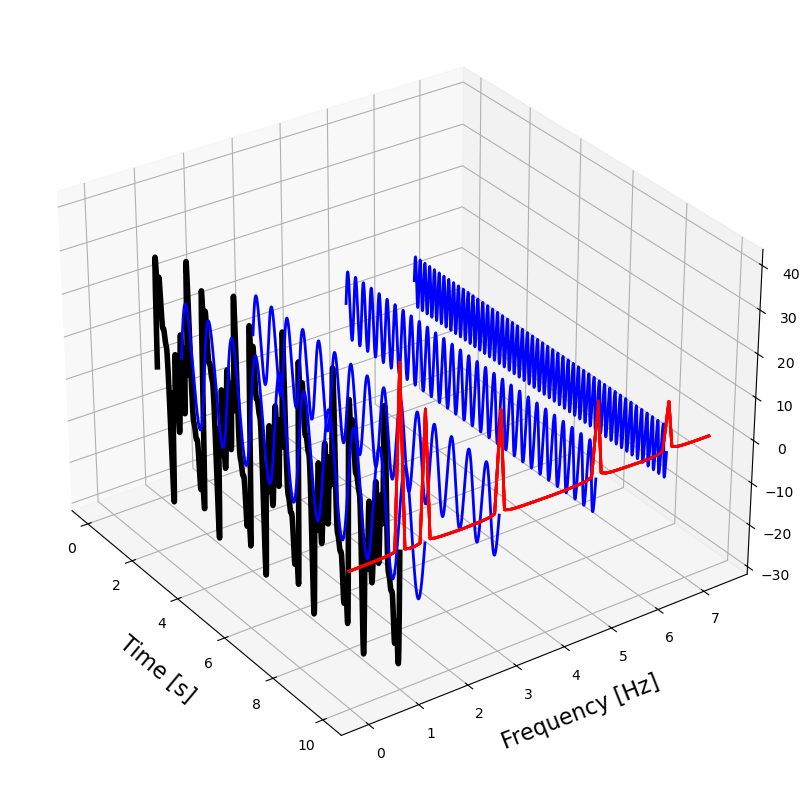

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

t_n = 10
N = 1000
T = t_n / N
f_s = 1 / T

def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
    fft_values_ = np.fft.fft(y_values)
    fft_values = 2.0 / N * np.abs(fft_values_[0:N // 2])
    return f_values, fft_values

x_value = np.linspace(0, t_n, N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii] * np.sin(2 * np.pi * frequencies[ii] * x_value) for ii in range(len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)

f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)

colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)

y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]

for ii in range(len(frequencies)):
    signal = y_values_[ii]
    color = colors[ii]
    length = signal.shape[0]
    x = np.linspace(0, 10, 1000)
    y = np.array([frequencies[ii]] * length)
    z = signal

    if ii == 0:
        linewidth = 4
    else:
        linewidth = 2
    ax.plot(list(x), list(y), zs=list(z), linewidth=linewidth, color=color)

    x = [10] * 75
    y = f_values[:75]
    z = fft_values[:75] * 3
    ax.plot(list(x), list(y), zs=list(z), linewidth=2, color='red')

ax.view_init(elev=30, azim=-35)

plt.tight_layout()
plt.show()
